In [4]:
import numpy as np 
import pandas as pd 

In [6]:
df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )
# dọn dẹp, làm sạch dữ liệu
#xóa cột
df_can.drop(['AREA','REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
#sửa tên
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName': 'Region'}, inplace=True)
#thống nhất cột str 
df_can.columns = list(map(str, df_can.columns))
#đặt index 
df_can.set_index('Country', inplace=True)
#Thêm cột tổng
years = list(map(str, range(1980, 2014)))
df_can['Total'] = df_can[years].sum(axis=1)

In [7]:
%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt 

/var/folders/06/04d49vtj74502_hy9ddnptr80000gp/T/ipykernel_22189/2998968204.py:3: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_continents = df_can.groupby('Continent', axis=0).sum()


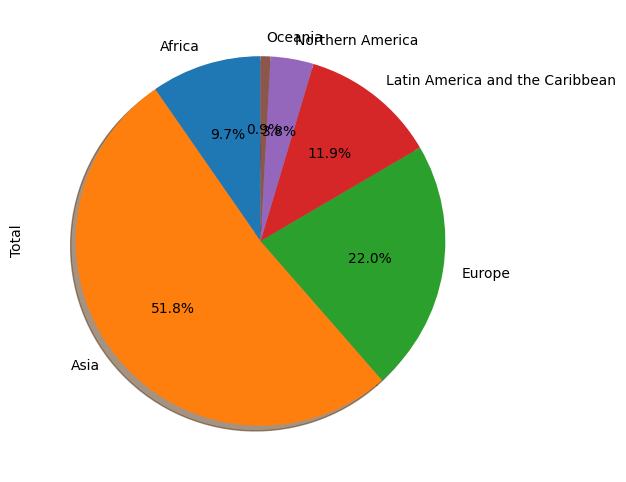

In [8]:
# nhóm các quốc gia theo lục địa, sử dụng hàm sum
# khi groupby phải luôn có 1 hàm aggregate đi kèm (sum, count, mean, apply...)
df_continents = df_can.groupby('Continent', axis=0).sum()
df_continents.head()
# Draw
df_continents['Total'].plot(kind='pie', 
                            figsize=(6,6), 
                            autopct='%1.1f%%' # format hiển thị dữ liệu trong hình tròn
                            ,startangle=90 # quay hình tròn 
                            , shadow=True 
                            )
plt.show()

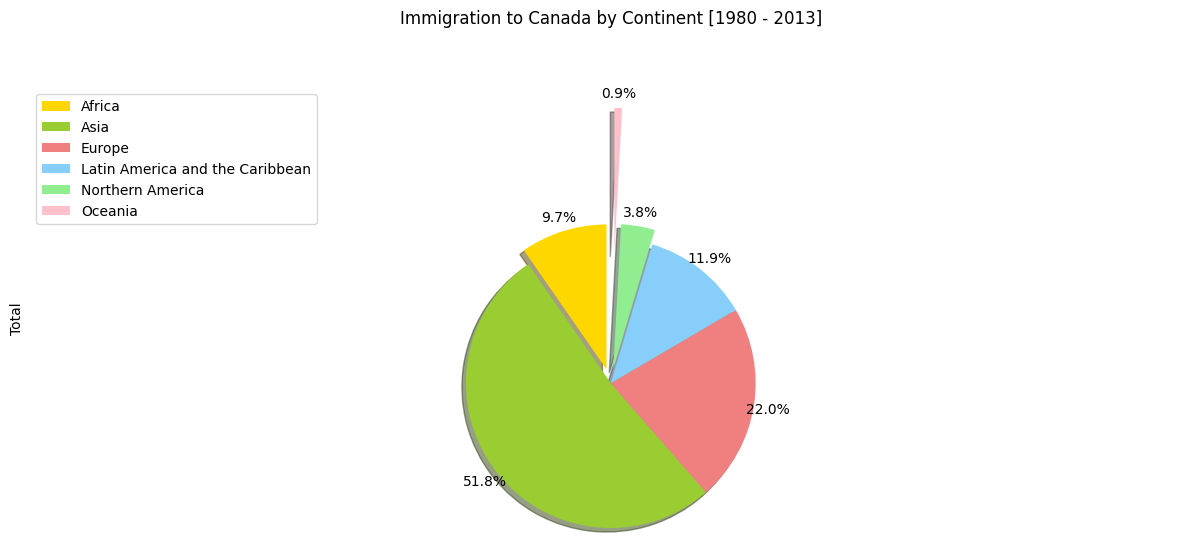

In [11]:
# style lại
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen','pink']
# Tỉ lệ cho mỗi lục địa để bù đắp mỗi wedge(1 lát cắt trong hình tròn)
# có 6 lát cắt, cho 3 lát cắt thấp nhất lồi ra ngoài
explode_list = [0.1,0, 0, 0, 0.1, 0.9]
df_continents['Total'].plot(kind='pie', shadow=True, figsize=(15,6),
                            autopct='%1.1f%%',
                            startangle=90,
                            labels=None, 
                            pctdistance=1.1, # khoảng cách chú thích với tâm vòng tròn 
                            colors=colors_list,
                            explode=explode_list
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12)
#hiển thị đúng hình tròn 
plt.axis('equal')

#Hiển thị bảng chú thích 
#loc: location, trên cùng bên trái
plt.legend(labels=df_continents.index, loc='upper left')
plt.show()

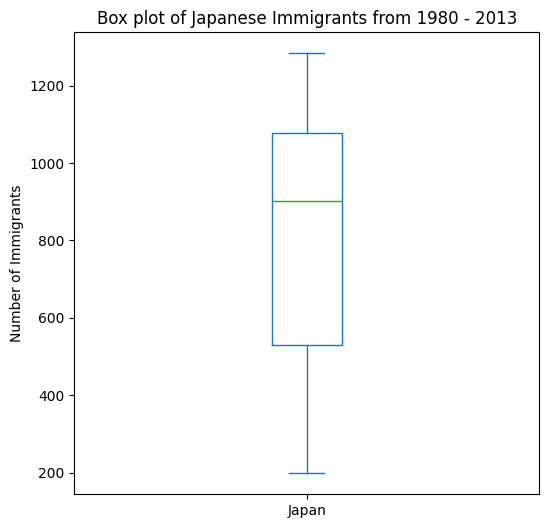

In [17]:
# Biểu đồ hộp
# Gồm 5 thành phần: min, max, median, 25%, 75%
df_japan = df_can.loc[['Japan'], years].transpose() 
df_japan.head()
df_japan.plot(kind='box', figsize=(6,6))
plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.show()


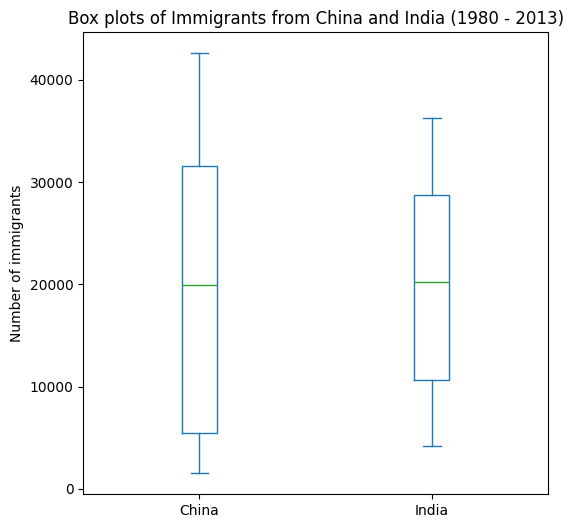

In [20]:
df_japan.describe()
df_CI = df_can.loc[['China', 'India'], years].transpose()
df_CI.plot(kind='box', figsize=(6,6))
plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of immigrants')
plt.show()

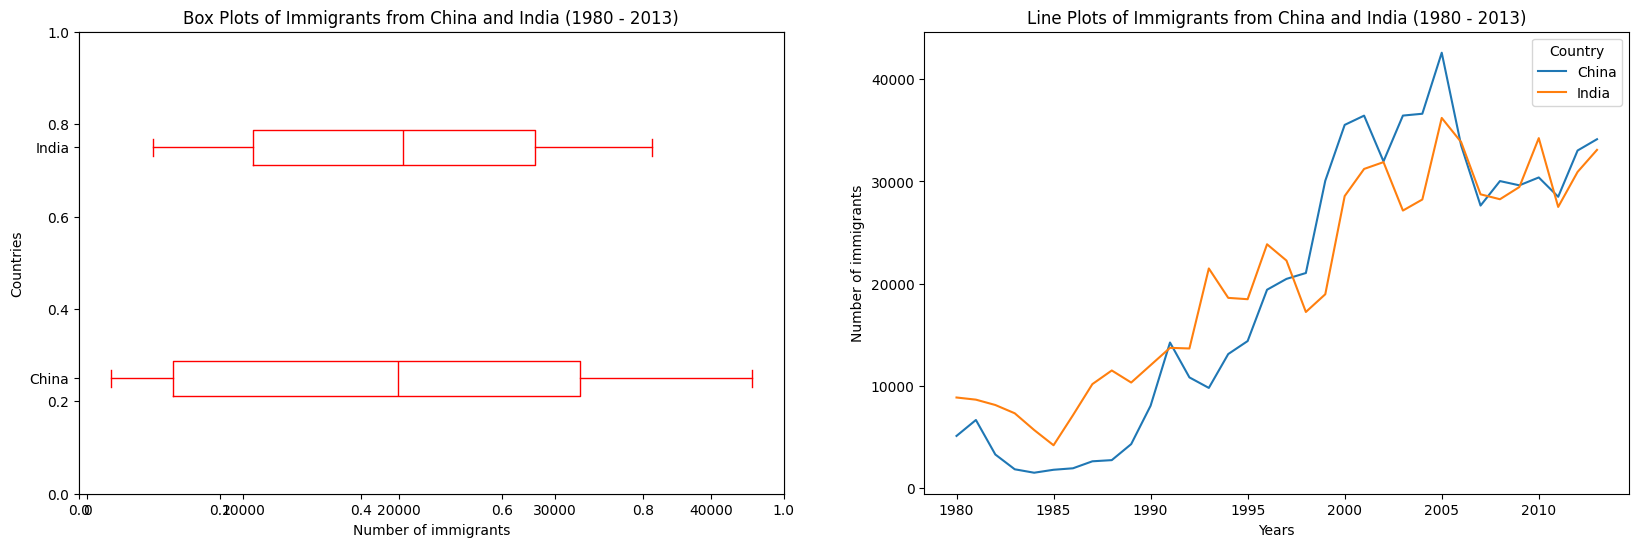

In [25]:
# Cần vẽ nhiều biểu đồ trong 1 figure(khung hình tổng thể)-> cần subplots(làm việc với lớp artist)
# tạo figure
fig = plt.figure()
# tạo subplot 1 (1 dòng , 2 cột, cột 1)
ax01 = fig.add_subplot(1,2,1)
# nhỏ hơn 10 có thể dùng như này 
ax01 = fig.add_subplot(121)
ax02 = fig.add_subplot(122)
#ax02 = fig.add_subplot(1,2,2)
# Vẽ 2 biểu đồ hộp và đường 
df_CI.plot(kind='box', vert=False, figsize=(20,6),ax=ax01, color='red')
ax01.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax01.set_ylabel('Countries')
ax01.set_xlabel('Number of immigrants')
# biểu đồ đường 
df_CI.plot(kind='line', figsize=(20,6), ax=ax02)
ax02.set_title('Line Plots of Immigrants from China and India (1980 - 2013)')
ax02.set_ylabel('Number of immigrants') 
ax02.set_xlabel('Years')

plt.show()

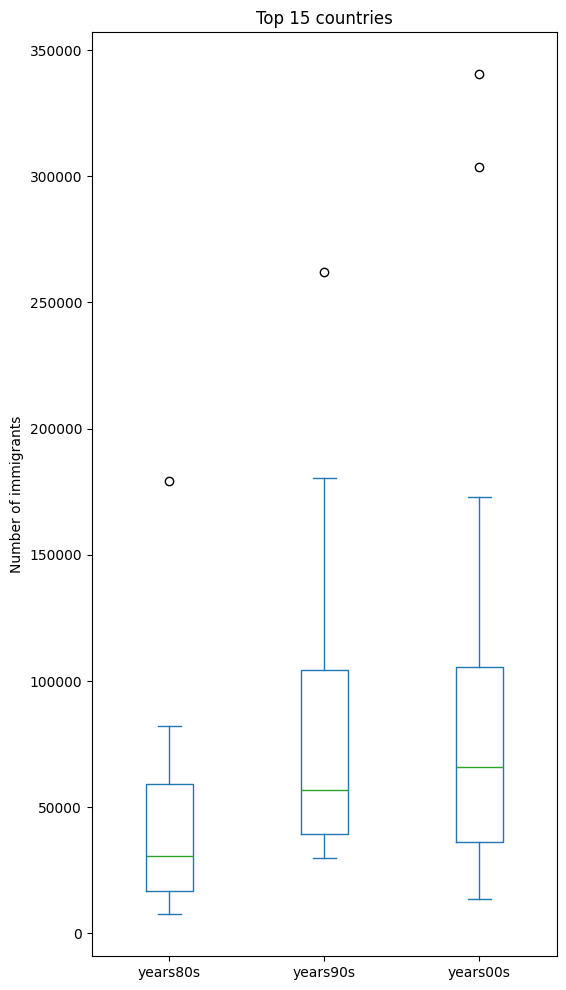

In [33]:
# Top 15 
df_top15 = df_can.sort_values(by='Total', ascending=False, axis=0).head(15)
#years 80,90,00
years80 = list(map(str, range(1980,1990)))
years90 = list(map(str, range(1990,2000)))
years00 = list(map(str, range(2000,2010)))
# slice df 
df_80 = df_top15.loc[:,years80].sum(axis=1)
df_90 = df_top15.loc[:,years90].sum(axis=1)
df_00 = df_top15.loc[:,years00].sum(axis=1)
# merge to new df
df_new = pd.DataFrame({'years80s': df_80, 'years90s': df_90, 'years00s': df_00 })
df_new.head()
#draw 
df_new.plot(kind='box', figsize=(6,12))
plt.title('Top 15 countries')
plt.ylabel('Number of immigrants')
plt.show()
# có những dấu chấm gọi nó là outlier 
# outlier nằm ngoài khoảng Q3 + 1.5(Q3-Q1)
# dưới khoảng Q1 - 1.5(Q3-Q1)
# Q3-Q1: IQR 



In [43]:
#df_new = df_new.reset_index()
# Vượt ngưỡng outlỉer ngoài 
# 209611 =  105505 + 1.5*(105505-36101)
df_new[df_new['years00s']> 209611.5]
df_new.describe()

,level_0,index,years80s,years90s,years00s
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,7.000000,7.000000,44418.333333,85594.666667,97471.533333
std,4.472136,4.472136,44190.676455,68237.560246,100583.204205
min,0.000000,0.000000,7613.000000,30028.000000,13629.000000
25%,3.500000,3.500000,16698.000000,39259.000000,36101.500000
50%,7.000000,7.000000,30638.000000,56915.000000,65794.000000
75%,10.500000,10.500000,59183.000000,104451.500000,105505.500000
max,14.000000,14.000000,179171.000000,261966.000000,340385.000000


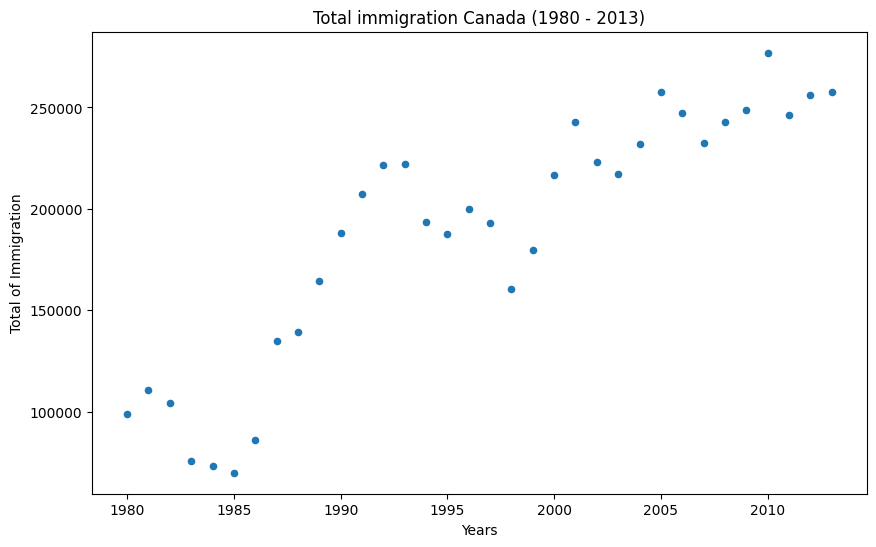

In [50]:
# Biểu đồ phân tán(scatter)
# là biểu đồ giống như biểu đồ line, nhưng k nối các điểm lại với nhau thành 1 đường

# Lấy tổng dân số mỗi năm 
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
# hiện tại index là year 
#đổi year thành int 
df_tot.index = df_tot.index.map(int)
#đặt lại chỉ mục 
df_tot.reset_index(inplace=True)
# đặt lại tên 
df_tot.columns = ['year', 'total']
df_tot.head()

# vẽ biểu đồ kind = scatter
# scatter cần chỉ ra x, y là gì 
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10,6))
plt.title('Total immigration Canada (1980 - 2013)')
plt.xlabel('Years')
plt.ylabel('Total of Immigration')
plt.show()

[ 5.56709228e+03 -1.09261952e+07]


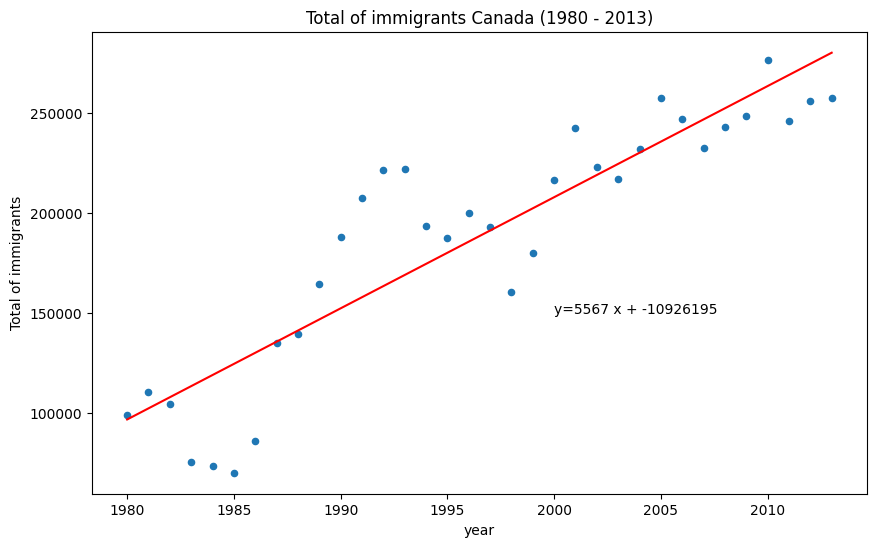

In [70]:
# Vẽ 1 đường biểu diễn xu hướng của dữ liệu
#np.polyfit(x,y,deg=1)
#trả về a,b trong phương trình y = ax+b.
#deg=1 thể hiện phương trình bậc nhất
#x-> np(array)
#y-> np(array)
x = df_tot['year'] # trả về kiểu series
y = df_tot['total']
fit = np.polyfit(x,y, deg=1)
print(fit)
# Vẽ lại biểu đồ scatter thêm đường xu hướng
df_tot.plot(kind='scatter', figsize=(10,6), x='year', y='total')

plt.title('Total of immigrants Canada (1980 - 2013)')
plt.ylabel('Total of immigrants')
# Vẽ đường xu hướng(đồ thị)

plt.plot(x, fit[0]*x + fit[1],color='red')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000,150000))

plt.show()
# 
